### Predicting gender from student data
This notebook uses Student Alcohol Consumption dataset from Kaggle (https://www.kaggle.com/uciml/student-alcohol-consumption). It contains demographic,  social and academic information relating to students in a maths course at two secondary schools in Portugal.<br> 
Initial exploratory analyses of all features is done and presented in graph form.
A decicion tree classifier model and logistic regression model. The aims of both models is to use the given features to in **predicting the gender of a student**.<br> 
Models are evaluated and GridSearchCV is used to get the best fitted models for both.

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

import graphviz
import pydotplus
import io
from scipy import misc

In [2]:
# loading the data and having a look at the first 5 rows.
df = pd.read_csv("data/student-alcohol-maths.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# how many rows and columns make up the dataset.
df.shape

(395, 33)

In [4]:
# there are no missing values in the dataset.
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
# to get an overall ideas of key statistics of dataset for each feature.
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Total number of student records.

In [6]:
# total students 
num_total = len(df)
print("Total number of student records: ", num_total)

Total number of student records:  395


### Percentage of students from each school.
Majority of students (>80%) are from Gabriel Pereira school.

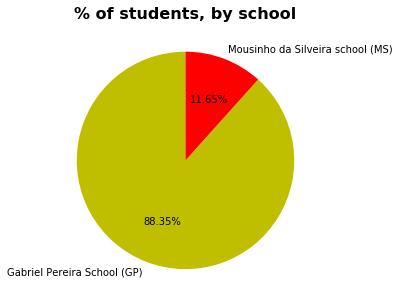

In [7]:
# total students 
num_total = len(df)

# Number of GP students
num_gp = df["school"].value_counts()["GP"]

# Number of MS students
num_ms = df["school"].value_counts()["MS"]

# define pie chart values, labels & colors and plot pie chart.
school_figs = [num_gp, num_ms]
school_name = ["Gabriel Pereira School (GP)", "Mousinho da Silveira school (MS)"]
colors = ["y", "r"]
plt.title("% of students, by school", fontweight="bold", size=16)
plt.pie(school_figs, labels=school_name, colors=colors, startangle=90, autopct="%.2f%%")

# change the size of the pie chart.
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

### Percentage of boys & girls in the study. 
Shows a fairly even split between boys and girls.

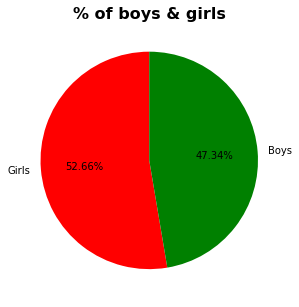

In [8]:
num_total = len(df)

# Number of girls in the study
girls = df["sex"].value_counts()["F"]

# Number of boys in the study
boys = df["sex"].value_counts()["M"]

# define pie chart values, labels & colors & plot pie chart
numbers = [girls, boys]
name = ["Girls", "Boys"]
colors = ["r", "g"]
plt.title("% of boys & girls", fontweight="bold", size=16)
plt.pie(numbers, labels=name, colors=colors, startangle=90, autopct="%.2f%%")

# change the size of the pie chart.
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

### This figure plots a summary of all the study features.
We can see that:
- most of the students are under 20 and from urban areas
- approx 40% of students have moderate or higher levels of weekend alcohol consumption
- less than 20% of students have moderate or higher weekday alcohol consumption
- half of students have good/very good current health
- over 80% have parents who live together
- between students mothers and fathers, mothers had slightly higher levels of education.
- over half of students mothers had secondary school level education or higher. over 30% of mother's had higher education.
- approx 45% of fathers had secondary school level education or higher.
- over 60% of students listed their mother as their primary guardian.
- the highest proportion of absenteeism from school was absences between 0 to 10 times (over a quarter of all absences).
- almost 60% receive family educational support.
- approx 80% of students have never failed a class before.
- 70% of students come from larger families with greater than 3 members.
- over 60% of students reported very good/excellent quality of relationship with family members.
- around 3 in 10 were involved in a romantic relationship.
- most students chose the school based on a course.
- most spend less than 15 mins to get to school.
- approx 8 in 10 students do no receive extra educational support at school
- half of the students spend between 2 to 5 bours a week studying.
- over 50% do not take extra paid classes within a subject.
- the split between those who do extra curricular activities and those who don't is fairly even.
- over 20% do not have internet access at home.
- over half of all students have very low to moderate amounts of free time after school.
- a third of students reported freequency of going out with friends after school as very low or low.
- over 70% attended nursery school and less than 10% do not want to pursue higher education.
- mode maths grade in the first term was 10, with a range of scores between 3 and 19.
- mode maths grade in the second term was 9, with a range of scores between 0 and 19.
- mode overall maths grade was 10, with a range of scores between 0 and 20.

Text(0.5, 1059.0000000000018, 'Grade (G3)')

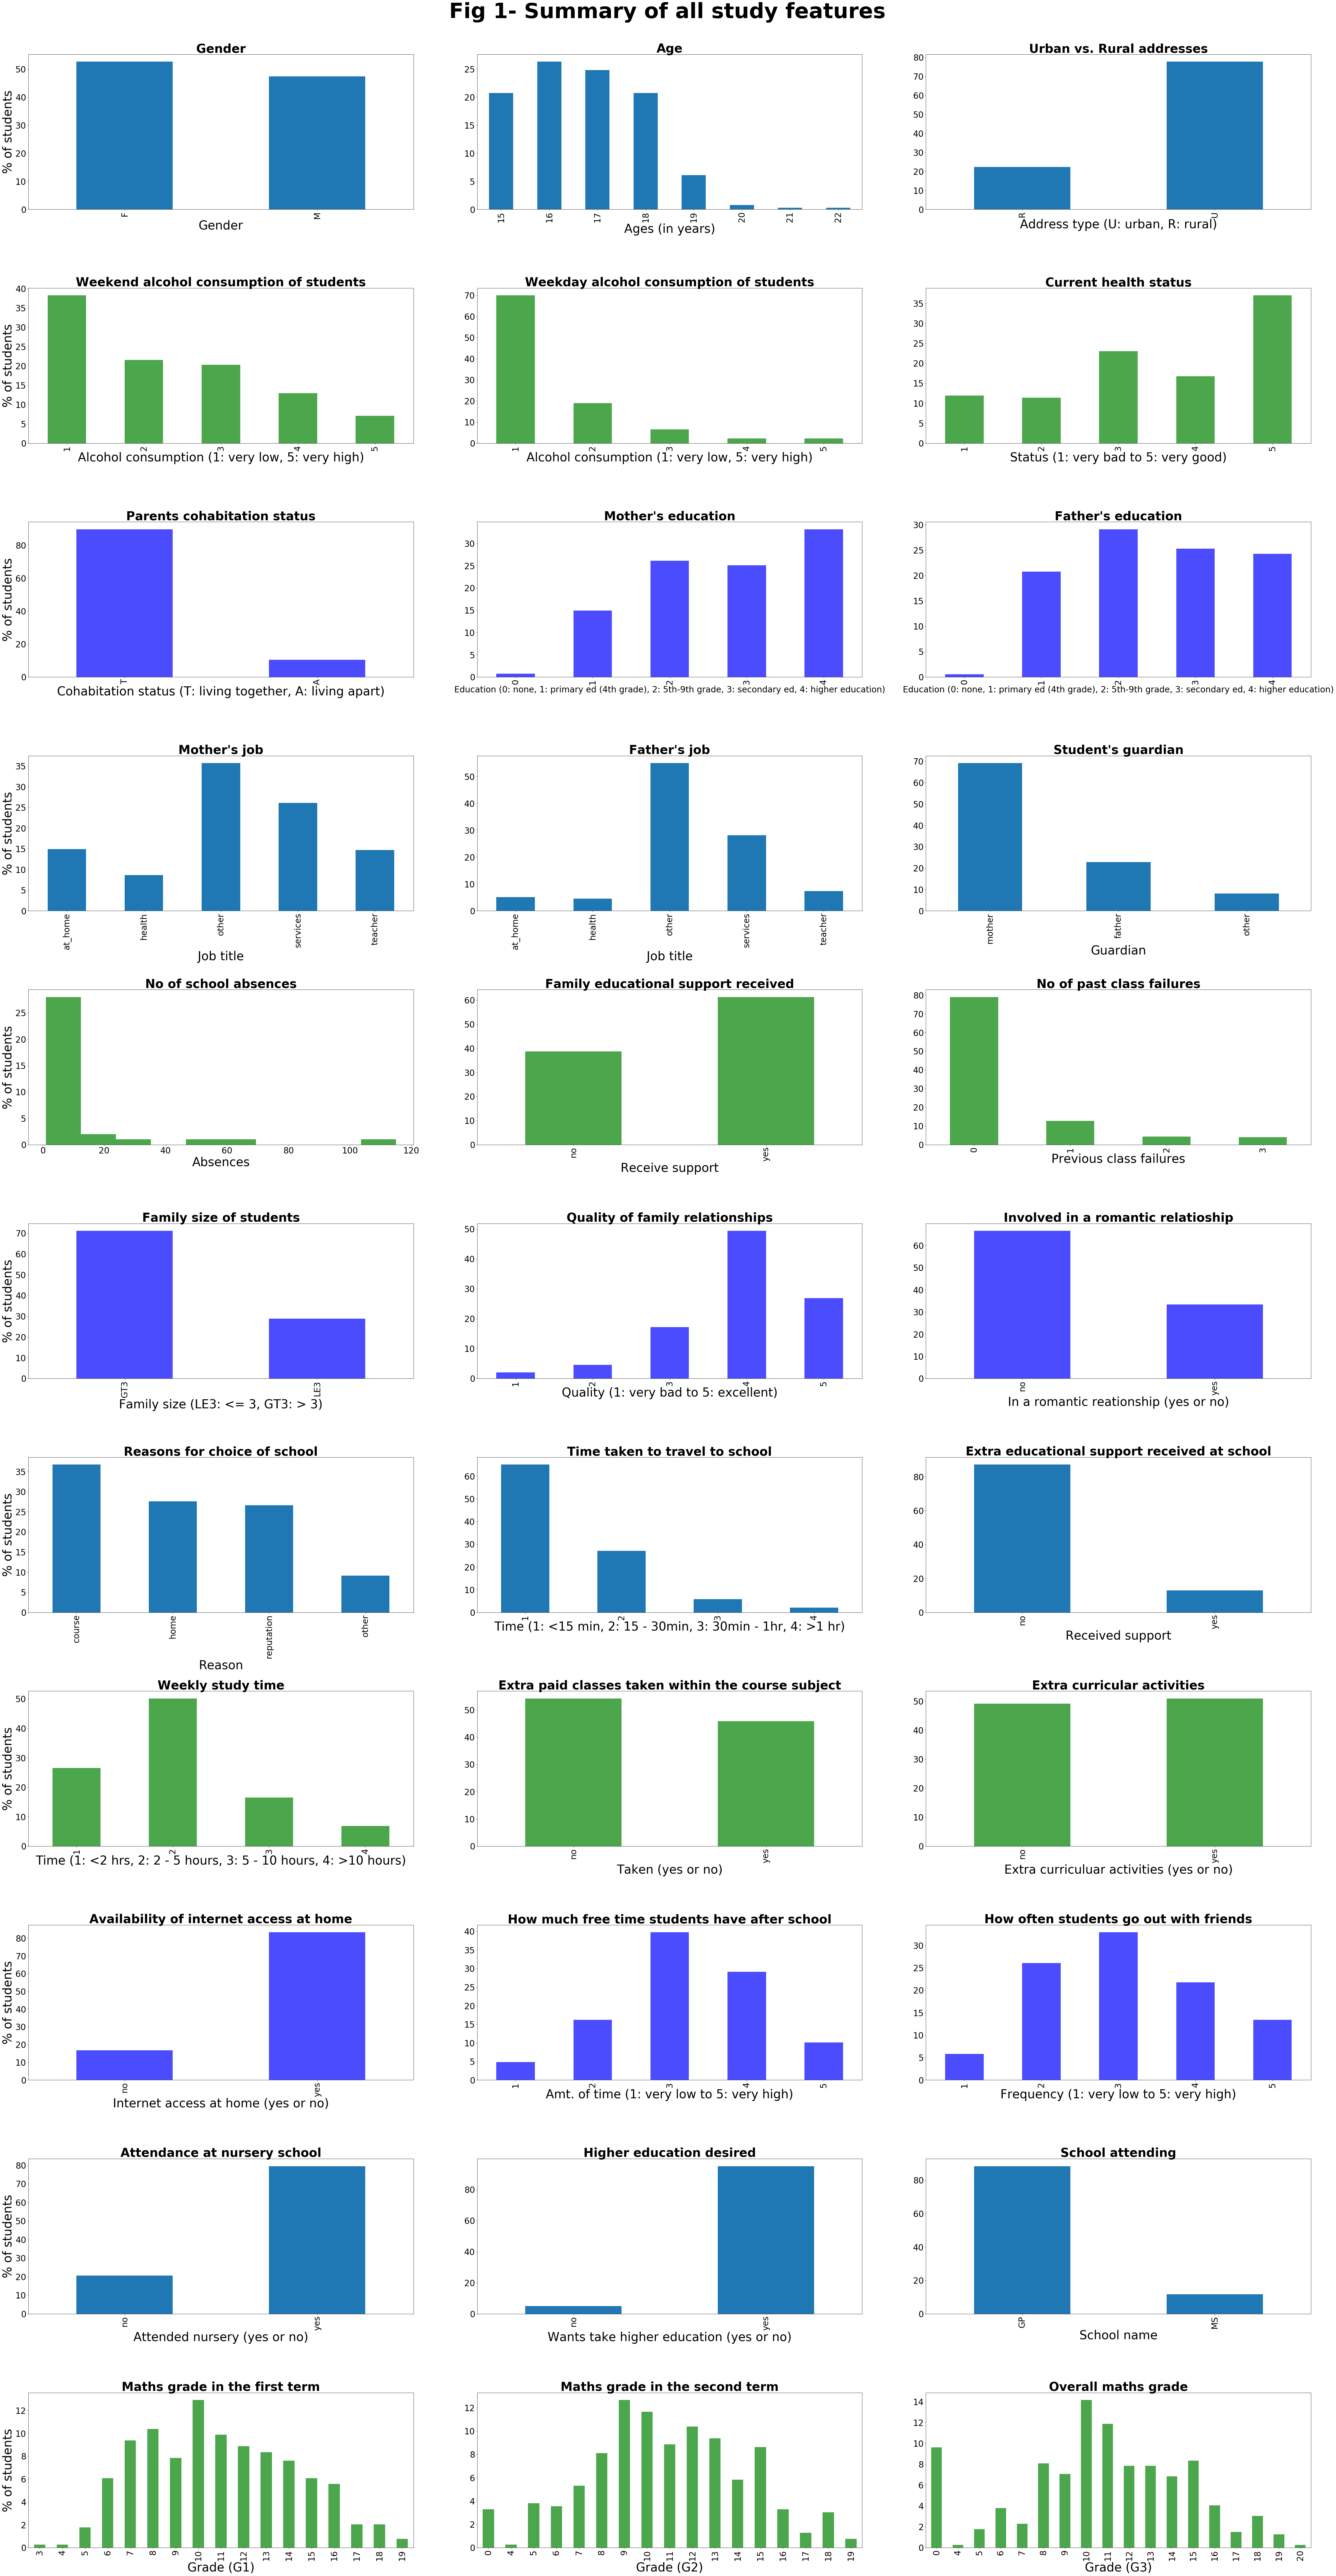

In [9]:
# Setting up a figure to accomodate the 30 features given in the dataset, in 30 subplots. 
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(60, 120))
fig.tight_layout(pad=2, w_pad=18, h_pad=25)
fig.suptitle("Fig 1- Summary of all study features", fontweight="bold", size=70)
fig.subplots_adjust(top=0.96)

# sex
gender = (df["sex"].value_counts() / df["sex"].count()) * 100
gender.plot(kind="bar", ax=axes[0,0])
axes[0,0].tick_params(axis = "both", labelsize = 28)
axes[0,0].set_title("Gender", fontweight="bold", size=40)
axes[0,0].set_xlabel("Gender", size=40)
axes[0,0].set_ylabel("% of students", size=40)
                     
# age
age = (df["age"].value_counts() / df["age"].count()) * 100
age.sort_index().plot(kind="bar", ax=axes[0,1])
axes[0,1].tick_params(axis = "both", labelsize = 28)
axes[0,1].set_title("Age", fontweight="bold", size=40)
axes[0,1].set_xlabel("Ages (in years)", size=40)

# address
address = (df["address"].value_counts() / df["address"].count()) * 100
address.sort_index().plot(kind="bar", ax=axes[0,2])
axes[0,2].tick_params(axis = "both", labelsize = 28)
axes[0,2].set_title("Urban vs. Rural addresses", fontweight="bold", size=40)
axes[0,2].set_xlabel("Address type (U: urban, R: rural)",size=40)


# weekend alcohol consumption
walc = (df["Walc"].value_counts() / df["Walc"].count()) * 100
walc.sort_index().plot(kind="bar", ax=axes[1,0], color="g", alpha=0.7)
axes[1,0].tick_params(axis = "both", labelsize = 28)
axes[1,0].set_title("Weekend alcohol consumption of students", fontweight="bold", size=40)
axes[1,0].set_xlabel("Alcohol consumption (1: very low, 5: very high)", size=40)
axes[1,0].set_ylabel("% of students", size=40)

# daily alcohol consumption
dalc = (df["Dalc"].value_counts() / df["Dalc"].count()) * 100
dalc.sort_index().plot(kind="bar", ax=axes[1,1], color="g", alpha=0.7)
axes[1,1].tick_params(axis = "both", labelsize = 28)
axes[1,1].set_title("Weekday alcohol consumption of students", fontweight="bold", size=40)
axes[1,1].set_xlabel("Alcohol consumption (1: very low, 5: very high)", size=40)

# current health status
health = (df["health"].value_counts() / df["health"].count()) * 100
health.sort_index().plot(kind="bar", ax=axes[1,2], color="g", alpha=0.7)
axes[1,2].tick_params(axis = "both", labelsize = 28)
axes[1,2].set_title("Current health status", fontweight="bold", size=40)
axes[1,2].set_xlabel("Status (1: very bad to 5: very good)", size=40)


# parents cohabitation status
pstatus = (df["Pstatus"].value_counts() / df["Pstatus"].count()) * 100
pstatus.plot(kind="bar", ax=axes[2,0], color="b", alpha=0.7)
axes[2,0].tick_params(axis = "both", labelsize = 28)
axes[2,0].set_title("Parents cohabitation status", fontweight="bold", size=40)
axes[2,0].set_xlabel("Cohabitation status (T: living together, A: living apart)", size=40)
axes[2,0].set_ylabel("% of students", size=40)

# mother's education
medu = (df["Medu"].value_counts() / df["Medu"].count()) * 100
medu.sort_index().plot(kind="bar", ax=axes[2,1], color="b", alpha=0.7)
axes[2,1].tick_params(axis = "both", labelsize = 28)
axes[2,1].set_title("Mother's education", fontweight="bold", size=40)
axes[2,1].set_xlabel("Education (0: none, 1: primary ed (4th grade), 2: 5th-9th grade, 3: secondary ed, 4: higher education)", size=28)

# father's education
fedu = (df["Fedu"].value_counts() / df["Fedu"].count()) * 100
fedu.sort_index().plot(kind="bar", ax=axes[2,2], color="b", alpha=0.7)
axes[2,2].tick_params(axis = "both", labelsize = 28)
axes[2,2].set_title("Father's education", fontweight="bold", size=40)
axes[2,2].set_xlabel("Education (0: none, 1: primary ed (4th grade), 2: 5th-9th grade, 3: secondary ed, 4: higher education)", size=28)


# mother's job
mjob = (df["Mjob"].value_counts() / df["Mjob"].count()) * 100
mjob.sort_index().plot(kind="bar", ax=axes[3,0])
axes[3,0].tick_params(axis = "both", labelsize = 28)
axes[3,0].set_title("Mother's job", fontweight="bold", size=40)
axes[3,0].set_xlabel("Job title", size=40)
axes[3,0].set_ylabel("% of students", size=40)

# father's job
fjob = (df["Fjob"].value_counts() / df["Fjob"].count()) * 100
fjob.sort_index().plot(kind="bar", ax=axes[3,1])
axes[3,1].tick_params(axis = "both", labelsize = 28)
axes[3,1].set_title("Father's job", fontweight="bold", size=40)
axes[3,1].set_xlabel("Job title", size=40)

# student's guardian
guardian = (df["guardian"].value_counts() / df["guardian"].count()) * 100
guardian.plot(kind="bar", ax=axes[3,2])
axes[3,2].tick_params(axis = "both", labelsize = 28)
axes[3,2].set_title("Student's guardian", fontweight="bold", size=40)
axes[3,2].set_xlabel("Guardian", size=40)


# number of school absences
absences = df["absences"].value_counts() 
absences.plot(kind="hist", ax=axes[4,0], color="g", alpha=0.7)
axes[4,0].tick_params(axis = "both", labelsize = 28)
axes[4,0].set_title("No of school absences", fontweight="bold", size=40)
axes[4,0].set_xlabel("Absences", size=40)
axes[4,0].set_ylabel("% of students", size=40)

# family education support
famsup = (df["famsup"].value_counts() / df["famsup"].count()) * 100
famsup.sort_index().plot(kind="bar", ax=axes[4,1], color="g", alpha=0.7)
axes[4,1].tick_params(axis = "both", labelsize = 28)
axes[4,1].set_title("Family educational support received", fontweight="bold", size=40)
axes[4,1].set_xlabel("Receive support", size=40)

# no of past class failures
failures = (df["failures"].value_counts() / df["failures"].count()) * 100
failures.sort_index().plot(kind="bar", ax=axes[4,2], color="g", alpha=0.7)
axes[4,2].tick_params(axis = "both", labelsize = 28)
axes[4,2].set_title("No of past class failures", fontweight="bold", size=40)
axes[4,2].set_xlabel("Previous class failures", size=40)


# family size
famsize = (df["famsize"].value_counts() / df["famsize"].count()) * 100
famsize.plot(kind="bar", ax=axes[5,0], color="b", alpha=0.7)
axes[5,0].tick_params(axis = "both", labelsize = 28)
axes[5,0].set_title("Family size of students", fontweight="bold", size=40)
axes[5,0].set_xlabel("Family size (LE3: <= 3, GT3: > 3)", size=40)
axes[5,0].set_ylabel("% of students", size=40)

# quality of family relationships
famrel = (df["famrel"].value_counts() / df["famrel"].count()) * 100
famrel.sort_index().plot(kind="bar", ax=axes[5,1], color="b", alpha=0.7)
axes[5,1].tick_params(axis = "both", labelsize = 28)
axes[5,1].set_title("Quality of family relationships", fontweight="bold", size=40)
axes[5,1].set_xlabel("Quality (1: very bad to 5: excellent)", size=40)

# with a romantic relationship
romantic = (df["romantic"].value_counts() / df["romantic"].count()) * 100
romantic.sort_index().plot(kind="bar", ax=axes[5,2], color="b", alpha=0.7)
axes[5,2].tick_params(axis = "both", labelsize = 28)
axes[5,2].set_title("Involved in a romantic relatioship", fontweight="bold", size=40)
axes[5,2].set_xlabel("In a romantic reationship (yes or no)", size=40)


# reason to choose the school
reason = (df["reason"].value_counts() / df["reason"].count()) * 100
reason.plot(kind="bar", ax=axes[6,0])
axes[6,0].tick_params(axis = "both", labelsize = 28)
axes[6,0].set_title("Reasons for choice of school", fontweight="bold", size=40)
axes[6,0].set_xlabel("Reason", size=40)
axes[6,0].set_ylabel("% of students", size=40)

# home to school travel time
traveltime = (df["traveltime"].value_counts() / df["traveltime"].count()) * 100
traveltime.sort_index().plot(kind="bar", ax=axes[6,1])
axes[6,1].tick_params(axis = "both", labelsize = 28)
axes[6,1].set_title("Time taken to travel to school", fontweight="bold", size=40)
axes[6,1].set_xlabel("Time (1: <15 min, 2: 15 - 30min, 3: 30min - 1hr, 4: >1 hr)", size=40)

# extra educational support
schoolsup = (df["schoolsup"].value_counts() / df["schoolsup"].count()) * 100
schoolsup.sort_index().plot(kind="bar", ax=axes[6,2])
axes[6,2].tick_params(axis = "both", labelsize = 28)
axes[6,2].set_title("Extra educational support received at school", fontweight="bold", size=40)
axes[6,2].set_xlabel("Received support", size=40)


# weekly study time
studytime = (df["studytime"].value_counts() / df["studytime"].count()) * 100
studytime.sort_index().plot(kind="bar", ax=axes[7,0], color="g", alpha=0.7)
axes[7,0].tick_params(axis = "both", labelsize = 28)
axes[7,0].set_title("Weekly study time", fontweight="bold", size=40)
axes[7,0].set_xlabel("Time (1: <2 hrs, 2: 2 - 5 hours, 3: 5 - 10 hours, 4: >10 hours)", size=40)
axes[7,0].set_ylabel("% of students", size=40)

# extra paid classes in Maths
paid = (df["paid"].value_counts() / df["paid"].count()) * 100
paid.sort_index().plot(kind="bar", ax=axes[7,1], color="g", alpha=0.7)
axes[7,1].tick_params(axis = "both", labelsize = 28)
axes[7,1].set_title("Extra paid classes taken within the course subject", fontweight="bold", size=40)
axes[7,1].set_xlabel("Taken (yes or no)", size=40)

# extra curricular activities
activities = (df["activities"].value_counts() / df["activities"].count()) * 100
activities.sort_index().plot(kind="bar", ax=axes[7,2], color="g", alpha=0.7)
axes[7,2].tick_params(axis = "both", labelsize = 28)
axes[7,2].set_title("Extra curricular activities", fontweight="bold", size=40)
axes[7,2].set_xlabel("Extra curriculuar activities (yes or no)", size=40)


# internet access at home
internet = (df["internet"].value_counts() / df["internet"].count()) * 100
internet.sort_index().plot(kind="bar", ax=axes[8,0], color="b", alpha=0.7)
axes[8,0].tick_params(axis = "both", labelsize = 28)
axes[8,0].set_title("Availability of internet access at home", fontweight="bold", size=40)
axes[8,0].set_xlabel("Internet access at home (yes or no)", size=40)
axes[8,0].set_ylabel("% of students", size=40)

# free time after school
freetime = (df["freetime"].value_counts() / df["freetime"].count()) * 100
freetime.sort_index().plot(kind="bar", ax=axes[8,1], color="b", alpha=0.7)
axes[8,1].tick_params(axis = "both", labelsize = 28)
axes[8,1].set_title("How much free time students have after school", fontweight="bold", size=40)
axes[8,1].set_xlabel("Amt. of time (1: very low to 5: very high)", size=40)

# going out with friends
goout = (df["goout"].value_counts() / df["goout"].count()) * 100
goout.sort_index().plot(kind="bar", ax=axes[8,2], color="b", alpha=0.7)
axes[8,2].tick_params(axis = "both", labelsize = 28)
axes[8,2].set_title("How often students go out with friends", fontweight="bold", size=40)
axes[8,2].set_xlabel("Frequency (1: very low to 5: very high)", size=40)


# attended nursery school
nursery = (df["nursery"].value_counts() / df["nursery"].count()) * 100
nursery.sort_index().plot(kind="bar", ax=axes[9,0])
axes[9,0].tick_params(axis = "both", labelsize = 28)
axes[9,0].set_title("Attendance at nursery school", fontweight="bold", size=40)
axes[9,0].set_xlabel("Attended nursery (yes or no)", size=40)
axes[9,0].set_ylabel("% of students", size=40)

# wants to take higher education
higher = (df["higher"].value_counts() / df["higher"].count()) * 100
higher.sort_index().plot(kind="bar", ax=axes[9,1])
axes[9,1].tick_params(axis = "both", labelsize = 28)
axes[9,1].set_title("Higher education desired", fontweight="bold", size=40)
axes[9,1].set_xlabel("Wants take higher education (yes or no)", size=40)

# student's school
school = (df["school"].value_counts() / df["school"].count()) * 100
school.sort_index().plot(kind="bar", ax=axes[9,2])
axes[9,2].tick_params(axis = "both", labelsize = 28)
axes[9,2].set_title("School attending", fontweight="bold", size=40)
axes[9,2].set_xlabel("School name", size=40)


# first period grade
grade_one = (df["G1"].value_counts() / df["G1"].count()) * 100
grade_one.sort_index().plot(kind="bar", ax=axes[10,0], color="g", alpha=0.7)
axes[10,0].tick_params(axis = "both", labelsize = 28)
axes[10,0].set_title("Maths grade in the first term", fontweight="bold", size=40)
axes[10,0].set_xlabel("Grade (G1)", size=40)
axes[10,0].set_ylabel("% of students", size=40)

# second period grade
grade_two = (df["G2"].value_counts() / df["G2"].count()) * 100 
grade_two.sort_index().plot(kind="bar", ax=axes[10, 1], color="g", alpha=0.7)
axes[10,1].tick_params(axis = "both", labelsize = 28)
axes[10,1].set_title("Maths grade in the second term", fontweight="bold", size=40)
axes[10,1].set_xlabel("Grade (G2)", size=40)

# final grade
grade_three = (df["G3"].value_counts()  / df["G3"].count()) * 100
grade_three.sort_index().plot(kind="bar", ax=axes[10, 2], color="g", alpha=0.7)
axes[10,2].tick_params(axis = "both", labelsize = 28)
axes[10,2].set_title("Overall maths grade", fontweight="bold", size=40)
axes[10,2].set_xlabel("Grade (G3)", size=40) 

### Decision Tree Classifier model. 
Aim is to predict the gender of a student based on all given features (excl. gender)

In [10]:
# define features and target variable for decision tree model.
# convert categorical variables into dummy variables. Look at data shape of training and testing sets.
X = pd.get_dummies(df.loc[:, df.columns != "sex"])
y = df.loc[:, "sex"]

# separate dataset into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  

# instantiate decision tree classifier object with max depth.
clf = DecisionTreeClassifier(max_depth=3)

# fitting classifier to the training set.
dt = clf.fit(X_train, y_train)

# to predict the test set results.
y_pred = clf.predict(X_test)

# train/test shapes
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_train: {}".format(y_test.shape))

X_train: (316, 57)
X_test: (79, 57)
y_train: (316,)
y_train: (79,)


From the image below, it's seen that the best attribute for splitting the records is time students spent studying weekly. 

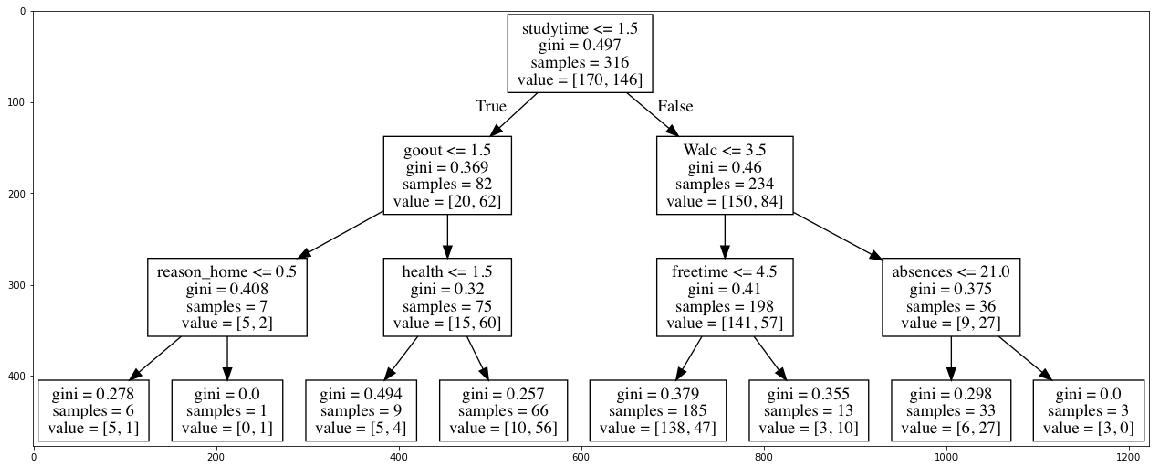

In [11]:
# function to produce decision tree image
def show_tree(tree, X, path):
    f=io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=X.columns)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
show_tree(dt, X, "student_data_tree.png")

### Accuracy of the Decision Tree Classifier model in predicting the gender of a student
Accuracy of this model is moderate- at 65%. This model has a low sensitivity score of 53.7%, which indicates its ability to predict male students correctly is only a little better than chance. It is better at predicting female students correctly. The model is likely to misclassify gender of students 35% of the time. Students predicted as being male have a 71% chance of being male.

In [12]:
# decision tree model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score using Decision Tree: %.2f%%" % (accuracy * 100.0))

cm_dt = pd.crosstab(y_test, y_pred, margins=True, margins_name="Total")
print("Confusion matrix for Logistic Regression model:")
print(cm_dt)

# splitting the confusion matrix into 4 parts
cm = metrics.confusion_matrix(y_test, y_pred)
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# sensitivity
sensitivity = tp / float(tp + fn)
print("Sensitivity: %.2f%%" % (sensitivity * 100))

# specificity
specificity= tn / float(tn + fp)
print("Specificity: %.2f%%" % (specificity * 100))

error = (fp + fn) / (tp + tn + fp + fn)
print("Error: %.2f%%" % (error * 100))

# precision
prec = tp / float(fp + tp)
print("Precision rate: %.2f%%" % (prec * 100))

Accuracy score using Decision Tree: 64.56%
Confusion matrix for Logistic Regression model:
col_0   F   M  Total
sex                 
F      29   9     38
M      19  22     41
Total  48  31     79
Sensitivity: 53.66%
Specificity: 76.32%
Error: 35.44%
Precision rate: 70.97%


### Make predictions with the decision tree classifier model
This uses 2 observations. 1 is from the dataset and the other is a made up observation.<br>
Model predicts the dataset observation with a 100% accuracy of being male. The new observation (2nd) is predicted as having a 75% chance of being female.

In [13]:
# make predictions using 2 student records.
# obs1 is a record from the student dataset (gender="M").
# obs2 is a new record that has been made up- not part of the student dataset.

obs1 = [[1, 0, 15, 1, 0, 1, 0, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 4, 2, 2, 1, 1, 1, 0, 16, 18, 19]]
obs2 = [[0, 0 , 0, 1, 20, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 4, 3, 2, 3, 12, 10, 15]]

# Use observations to predict gender of student using decision tree model.
print("Prediction for observation 1 using decision tree: {}".format(dt.predict(obs1)))
print("Prediction for observation 2 using decision tree: {}".format(dt.predict(obs2)))

# view predicted class probabilities 
print("Predicted probabilities for observation 1: {}".format(dt.predict_proba(obs1)))
print("Predicted probabilities for observation 2: {}".format(dt.predict_proba(obs2)))

Prediction for observation 1 using decision tree: ['M']
Prediction for observation 2 using decision tree: ['F']
Predicted probabilities for observation 1: [[0. 1.]]
Predicted probabilities for observation 2: [[0.74594595 0.25405405]]


### Best fitted decision tree classifier model using GridSearchCV.
The best fitted model has a higher accuracy than the model above, at 72%. This is achieved when the tree depth is at 4 (for the above model, it's at 3).

In [14]:
# setting parameters. 
dep = np.arange(1, 9)
param_grid = {"max_depth" : dep}

# instantiate decision tree classifier.
tree = DecisionTreeClassifier()

# instantiate GridSearchCV for decision tree classifier.
tree_cv = GridSearchCV(tree, param_grid=param_grid, cv=5)

# fitting classifier to X and y data values.
tree_cv.fit(X, y)
score = tree_cv.best_score_
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best accuracy score is: %.2f%%" % (score * 100))

Tuned Decision Tree Parameters: {'max_depth': 4}
Best accuracy score is: 72.41%


### Make predictions with the best fitted decision tree classifier model using GridSearchCV.
Model predicts the dataset observation with a 100% accuracy. The new observation (2nd) is predicted as having a 76% chance of being female (this is marginally higher than for the above model.

In [15]:
# Use the observations created above for the decision tree classifier model above.
# predict gender of student.
print("Prediction for observation 1 using best fitted decision tree: {}".format(tree_cv.predict(obs1)))
print("Prediction for observation 2 using best fitted decision tree: {}".format(tree_cv.predict(obs2)))

# view predicted class probabilities (male/female)
print("Predicted probabilities for observation 1: {}".format(tree_cv.predict_proba(obs1)))
print("Predicted probabilities for observation 2: {}".format(tree_cv.predict_proba(obs2)))

Prediction for observation 1 using best fitted decision tree: ['M']
Prediction for observation 2 using best fitted decision tree: ['F']
Predicted probabilities for observation 1: [[0. 1.]]
Predicted probabilities for observation 2: [[0.7638191 0.2361809]]


###  Logistic Regression  model.  
Aim is to predict the gender of a student based on the features. Compare results of Logistic Regression model to Decision Tree model. 

In [16]:
# define features and target variable for the logistic regression model
features = pd.get_dummies(df.loc[:, df.columns != "sex"])
target = df.loc[:, "sex"]

# separate dataset into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# instantiate logistic regression.
logreg = LogisticRegression()

# fit logistic regression model to the training set.
logreg.fit(X_train, y_train)

# to predict the test set results.
y_pred_class = logreg.predict(X_test)

### Logistic Regression model evaluation.
Accuracy of the logistic regression model higher than accuracy of the decision tree model but lower than the accuracy of the best fitted decision tree model. This model has a moderately high sensitivity score, showing that it is able to predict male students correctly around 68% of the time. It is also able to identify female students correctly 65.8% of the time.<br>
Students predicted as male have a 68% chance of being male. Model has a misclassification rate of 32.9%. This model has a lower precision than the decision tree model but it also slightly less likely to misclassify student gender.

In [17]:
# logistic regression model accuracy
lm_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("Accuracy score using Logistic Regression: %.2f%%" % (lm_accuracy * 100.0))

cm_log = pd.crosstab(y_test, y_pred_class, margins=True, margins_name="Total")
print("Confusion matrix for Logistic Regression model:")
print(cm_log)

confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(TP + FN)
print("Sensitivity: %.2f%%" % (sensitivity * 100))

specificity= TN / float(TN + FP)
print("Specificity: %.2f%%" % (specificity * 100))

error = (FP + FN) / (TP + TN + FP + FN)
print("Error: %.2f%%" % (error * 100))

precision = TP / float(FP + TP)
print("Precision rate: %.2f%%" % (precision * 100))

Accuracy score using Logistic Regression: 67.09%
Confusion matrix for Logistic Regression model:
col_0   F   M  Total
sex                 
F      25  13     38
M      13  28     41
Total  38  41     79
Sensitivity: 68.29%
Specificity: 65.79%
Error: 32.91%
Precision rate: 68.29%


### Make predictions with the logistic regression model

This model predicts both the dataset observation and new observation from above as female. This is different from both decision tree models which predicted the dataset observation as being male.

In [18]:
# Use the observation created above for the decision tree classifier model above.
# Use observations to predict gender of student.
print("Prediction for observation 1 using logistic regression model: {}".format(logreg.predict(obs1)))
print("Prediction for observation 2 using logistic regression model: {}".format(logreg.predict(obs2)))

Prediction for observation 1 using logistic regression model: ['F']
Prediction for observation 2 using logistic regression model: ['F']


### Best fitted logistic regression model using GridSearchCV.
The best fitted logistic regression model has a marginally lower accuracy score (71%) compared to the best fitted decision tree model (72%). 

In [19]:
# setting parameters
grid = {"C":np.logspace(-3, 3, 7)}

# create a GridSearchCV for logistic regression
logreg_cv = GridSearchCV(logreg, grid, cv=6)

# fitting classifier to X and y data values.
logreg_cv.fit(X_train, y_train)

logreg_score = logreg_cv.best_score_
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best accuracy score is: %.2f%%" % (logreg_score * 100))

Tuned Logistic Regression Parameters: {'C': 0.1}
Best accuracy score is: 70.89%


### Make predictions with the best fitted logistic regression model using GridSearchCV
The prediction results for this model are the same as for both decision tree models.

In [20]:
# Use the observation created above for the decision tree classifier model above.
# Use observations to predict gender of student.
print("Prediction for observation 1 using best fitted logistic regression model: {}".format(logreg_cv.predict(obs1)))
print("Prediction for observation 2 using best fitted logistic regression model: {}".format(logreg_cv.predict(obs2)))

Prediction for observation 1 using best fitted logistic regression model: ['M']
Prediction for observation 2 using best fitted logistic regression model: ['F']


In conclusion, the most accurate model the models above is the best fitted decision tree classifier model. However, sensitivity & specificity scores are more balanced for the logistic regression model that for the decision tree classifier model.